In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import keras
import keras.backend as K
from keras.layers import Conv1D, MaxPool1D, Dropout, UpSampling1D, Input, Flatten, Dense
from keras.models import *
from keras import optimizers
from keras.layers.merge import concatenate
from keras.callbacks import *

Using TensorFlow backend.
/home/buikhoi/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/buikhoi/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/buikhoi/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/buikhoi/.local/lib/python3.6/site-packages/tensorflow/py

In [2]:
model = Sequential()

model.add(Conv1D(16, 3, activation = 'relu', input_shape = (228, 1)))
model.add(MaxPool1D(2, 2))
model.add(Conv1D(32, 2, activation = 'relu'))
model.add(MaxPool1D(2, 2))
model.add(Conv1D(64, 3, activation = 'relu'))
model.add(MaxPool1D(2, 2))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.3))
model.add(Dense(9, activation='softmax'))

In [3]:
adam = optimizers.Adam(0.0001, 0.9, 0.99)
model.compile(adam, 'categorical_crossentropy', ['accuracy'])

In [4]:
reduce_lr = callbacks.ReduceLROnPlateau(monitor='accuracy', factor=0.2, patience=3, min_lr=0.0001)

In [7]:
temp = np.load('./Data/Training data/training.npz')
X_data = temp['xdata']
y_true = temp['ytrue']
y_hot = np.zeros((len(y_true), 9))
y_hot[np.arange(len(y_true)), y_true] = 1
X_train, X_test, y_train, y_test = train_test_split(X_data, y_hot)

In [8]:
history = model.fit(X_train, y_train, 64, 2000, 1, [reduce_lr], validation_data=(X_test, y_test))


Train on 1018 samples, validate on 340 samples
Epoch 1/2000
1018/1018 [==============================] - 3s 3ms/step - loss: 2860.6979 - accuracy: 0.1405 - val_loss: 1382.4301 - val_accuracy: 0.2029
Epoch 2/2000
1018/1018 [==============================] - 0s 82us/step - loss: 926.0396 - accuracy: 0.2004 - val_loss: 725.2815 - val_accuracy: 0.1824
Epoch 3/2000
1018/1018 [==============================] - 0s 85us/step - loss: 629.6330 - accuracy: 0.2014 - val_loss: 587.1124 - val_accuracy: 0.2206
Epoch 4/2000
1018/1018 [==============================] - 0s 85us/step - loss: 477.9267 - accuracy: 0.2014 - val_loss: 484.0864 - val_accuracy: 0.2147
Epoch 5/2000
1018/1018 [==============================] - 0s 85us/step - loss: 435.3180 - accuracy: 0.2387 - val_loss: 411.1105 - val_accuracy: 0.2588
Epoch 6/2000
1018/1018 [==============================] - 0s 87us/step - loss: 424.1523 - accuracy: 0.2318 - val_loss: 405.3088 - val_accuracy: 0.2529
Epoch 7/2000
1018/1018 [=====================

1018/1018 [==============================] - 0s 92us/step - loss: 73.0872 - accuracy: 0.5619 - val_loss: 77.4694 - val_accuracy: 0.5441
Epoch 54/2000
1018/1018 [==============================] - 0s 84us/step - loss: 77.6749 - accuracy: 0.5049 - val_loss: 96.0765 - val_accuracy: 0.5118
Epoch 55/2000
1018/1018 [==============================] - 0s 83us/step - loss: 122.7830 - accuracy: 0.4283 - val_loss: 54.4901 - val_accuracy: 0.6529
Epoch 56/2000
1018/1018 [==============================] - 0s 93us/step - loss: 122.7600 - accuracy: 0.4754 - val_loss: 84.5023 - val_accuracy: 0.5529
Epoch 57/2000
1018/1018 [==============================] - 0s 96us/step - loss: 88.3053 - accuracy: 0.5079 - val_loss: 77.3774 - val_accuracy: 0.5412
Epoch 58/2000
1018/1018 [==============================] - 0s 88us/step - loss: 98.7021 - accuracy: 0.5029 - val_loss: 111.9940 - val_accuracy: 0.5382
Epoch 59/2000
1018/1018 [==============================] - 0s 80us/step - loss: 72.7459 - accuracy: 0.5727 - va

1018/1018 [==============================] - 0s 84us/step - loss: 56.5106 - accuracy: 0.5914 - val_loss: 30.9407 - val_accuracy: 0.6412
Epoch 108/2000
1018/1018 [==============================] - 0s 96us/step - loss: 35.1763 - accuracy: 0.6464 - val_loss: 53.4613 - val_accuracy: 0.6118
Epoch 109/2000
1018/1018 [==============================] - 0s 95us/step - loss: 49.4887 - accuracy: 0.6041 - val_loss: 54.7694 - val_accuracy: 0.5735
Epoch 110/2000
1018/1018 [==============================] - 0s 97us/step - loss: 45.9366 - accuracy: 0.5776 - val_loss: 35.8704 - val_accuracy: 0.6971
Epoch 111/2000
1018/1018 [==============================] - 0s 80us/step - loss: 40.9825 - accuracy: 0.6139 - val_loss: 26.4533 - val_accuracy: 0.7588
Epoch 112/2000
1018/1018 [==============================] - 0s 102us/step - loss: 20.4260 - accuracy: 0.7407 - val_loss: 21.6809 - val_accuracy: 0.7529
Epoch 113/2000
1018/1018 [==============================] - 0s 92us/step - loss: 33.3613 - accuracy: 0.6886 

1018/1018 [==============================] - 0s 102us/step - loss: 44.4664 - accuracy: 0.5992 - val_loss: 31.8673 - val_accuracy: 0.7000
Epoch 162/2000
1018/1018 [==============================] - 0s 87us/step - loss: 27.1217 - accuracy: 0.6837 - val_loss: 23.1038 - val_accuracy: 0.6853
Epoch 163/2000
1018/1018 [==============================] - 0s 86us/step - loss: 20.4737 - accuracy: 0.7269 - val_loss: 27.1607 - val_accuracy: 0.6176
Epoch 164/2000
1018/1018 [==============================] - 0s 97us/step - loss: 30.5823 - accuracy: 0.6690 - val_loss: 19.5090 - val_accuracy: 0.7794
Epoch 165/2000
1018/1018 [==============================] - 0s 94us/step - loss: 18.3143 - accuracy: 0.7417 - val_loss: 13.7261 - val_accuracy: 0.8176
Epoch 166/2000
1018/1018 [==============================] - 0s 81us/step - loss: 26.1469 - accuracy: 0.6837 - val_loss: 39.0008 - val_accuracy: 0.5382
Epoch 167/2000
1018/1018 [==============================] - 0s 87us/step - loss: 31.0748 - accuracy: 0.6444 

1018/1018 [==============================] - 0s 81us/step - loss: 15.3226 - accuracy: 0.7603 - val_loss: 13.9891 - val_accuracy: 0.8176
Epoch 216/2000
1018/1018 [==============================] - 0s 73us/step - loss: 14.9520 - accuracy: 0.7387 - val_loss: 19.0858 - val_accuracy: 0.7088
Epoch 217/2000
1018/1018 [==============================] - 0s 78us/step - loss: 12.2726 - accuracy: 0.7279 - val_loss: 14.0432 - val_accuracy: 0.7471
Epoch 218/2000
1018/1018 [==============================] - 0s 80us/step - loss: 12.6897 - accuracy: 0.7692 - val_loss: 10.6523 - val_accuracy: 0.7912
Epoch 219/2000
1018/1018 [==============================] - 0s 88us/step - loss: 14.8977 - accuracy: 0.7417 - val_loss: 13.6902 - val_accuracy: 0.7794
Epoch 220/2000
1018/1018 [==============================] - 0s 85us/step - loss: 18.3474 - accuracy: 0.7191 - val_loss: 10.9774 - val_accuracy: 0.7853
Epoch 221/2000
1018/1018 [==============================] - 0s 82us/step - loss: 20.9917 - accuracy: 0.7073 -

1018/1018 [==============================] - 0s 82us/step - loss: 14.6651 - accuracy: 0.6817 - val_loss: 20.1834 - val_accuracy: 0.6529
Epoch 270/2000
1018/1018 [==============================] - 0s 69us/step - loss: 13.0504 - accuracy: 0.7397 - val_loss: 14.0427 - val_accuracy: 0.7176
Epoch 271/2000
1018/1018 [==============================] - 0s 78us/step - loss: 10.6645 - accuracy: 0.7426 - val_loss: 7.3316 - val_accuracy: 0.7735
Epoch 272/2000
1018/1018 [==============================] - 0s 86us/step - loss: 7.9542 - accuracy: 0.7760 - val_loss: 11.7959 - val_accuracy: 0.7971
Epoch 273/2000
1018/1018 [==============================] - 0s 76us/step - loss: 10.2763 - accuracy: 0.7603 - val_loss: 9.9955 - val_accuracy: 0.7794
Epoch 274/2000
1018/1018 [==============================] - 0s 75us/step - loss: 11.0293 - accuracy: 0.7505 - val_loss: 29.9244 - val_accuracy: 0.6000
Epoch 275/2000
1018/1018 [==============================] - 0s 83us/step - loss: 13.3943 - accuracy: 0.7043 - va

Epoch 324/2000
1018/1018 [==============================] - 0s 80us/step - loss: 5.1781 - accuracy: 0.8006 - val_loss: 4.5620 - val_accuracy: 0.7735
Epoch 325/2000
1018/1018 [==============================] - 0s 84us/step - loss: 7.7994 - accuracy: 0.7534 - val_loss: 8.8502 - val_accuracy: 0.7206
Epoch 326/2000
1018/1018 [==============================] - 0s 78us/step - loss: 6.2711 - accuracy: 0.7583 - val_loss: 4.8620 - val_accuracy: 0.7618
Epoch 327/2000
1018/1018 [==============================] - 0s 82us/step - loss: 5.2042 - accuracy: 0.7790 - val_loss: 3.6637 - val_accuracy: 0.7912
Epoch 328/2000
1018/1018 [==============================] - 0s 80us/step - loss: 5.6716 - accuracy: 0.7387 - val_loss: 4.5477 - val_accuracy: 0.8471
Epoch 329/2000
1018/1018 [==============================] - 0s 78us/step - loss: 5.1257 - accuracy: 0.7868 - val_loss: 3.7560 - val_accuracy: 0.8353
Epoch 330/2000
1018/1018 [==============================] - 0s 79us/step - loss: 3.4335 - accuracy: 0.8212

Epoch 379/2000
1018/1018 [==============================] - 0s 77us/step - loss: 1.7759 - accuracy: 0.8625 - val_loss: 3.3492 - val_accuracy: 0.8000
Epoch 380/2000
1018/1018 [==============================] - 0s 83us/step - loss: 2.7774 - accuracy: 0.8124 - val_loss: 2.9025 - val_accuracy: 0.8412
Epoch 381/2000
1018/1018 [==============================] - 0s 79us/step - loss: 2.6875 - accuracy: 0.8183 - val_loss: 2.2880 - val_accuracy: 0.8353
Epoch 382/2000
1018/1018 [==============================] - 0s 88us/step - loss: 2.7418 - accuracy: 0.8183 - val_loss: 3.3131 - val_accuracy: 0.7824
Epoch 383/2000
1018/1018 [==============================] - 0s 77us/step - loss: 4.2126 - accuracy: 0.7692 - val_loss: 4.2395 - val_accuracy: 0.7794
Epoch 384/2000
1018/1018 [==============================] - 0s 81us/step - loss: 4.8274 - accuracy: 0.7544 - val_loss: 5.7609 - val_accuracy: 0.7176
Epoch 385/2000
1018/1018 [==============================] - 0s 77us/step - loss: 5.4738 - accuracy: 0.7387

Epoch 434/2000
1018/1018 [==============================] - 0s 81us/step - loss: 1.7858 - accuracy: 0.8468 - val_loss: 1.4245 - val_accuracy: 0.9029
Epoch 435/2000
1018/1018 [==============================] - 0s 80us/step - loss: 2.1930 - accuracy: 0.8193 - val_loss: 3.0400 - val_accuracy: 0.8147
Epoch 436/2000
1018/1018 [==============================] - 0s 82us/step - loss: 2.7132 - accuracy: 0.7868 - val_loss: 3.2725 - val_accuracy: 0.8353
Epoch 437/2000
1018/1018 [==============================] - 0s 88us/step - loss: 3.3412 - accuracy: 0.7839 - val_loss: 3.7154 - val_accuracy: 0.7588
Epoch 438/2000
1018/1018 [==============================] - 0s 79us/step - loss: 5.2010 - accuracy: 0.7112 - val_loss: 2.5175 - val_accuracy: 0.7824
Epoch 439/2000
1018/1018 [==============================] - 0s 75us/step - loss: 3.1047 - accuracy: 0.7976 - val_loss: 2.7672 - val_accuracy: 0.8412
Epoch 440/2000
1018/1018 [==============================] - 0s 90us/step - loss: 2.2663 - accuracy: 0.8202

Epoch 489/2000
1018/1018 [==============================] - 0s 75us/step - loss: 0.8906 - accuracy: 0.8949 - val_loss: 1.1688 - val_accuracy: 0.8912
Epoch 490/2000
1018/1018 [==============================] - 0s 71us/step - loss: 0.9537 - accuracy: 0.8929 - val_loss: 1.0868 - val_accuracy: 0.9029
Epoch 491/2000
1018/1018 [==============================] - 0s 73us/step - loss: 1.0232 - accuracy: 0.8861 - val_loss: 1.9437 - val_accuracy: 0.8176
Epoch 492/2000
1018/1018 [==============================] - 0s 82us/step - loss: 2.0913 - accuracy: 0.8006 - val_loss: 1.4821 - val_accuracy: 0.8853
Epoch 493/2000
1018/1018 [==============================] - 0s 71us/step - loss: 1.4416 - accuracy: 0.8585 - val_loss: 2.0421 - val_accuracy: 0.8559
Epoch 494/2000
1018/1018 [==============================] - 0s 85us/step - loss: 2.4692 - accuracy: 0.8212 - val_loss: 1.6435 - val_accuracy: 0.8235
Epoch 495/2000
1018/1018 [==============================] - 0s 75us/step - loss: 1.7727 - accuracy: 0.8281

Epoch 544/2000
1018/1018 [==============================] - 0s 88us/step - loss: 0.7598 - accuracy: 0.8929 - val_loss: 0.8880 - val_accuracy: 0.8853
Epoch 545/2000
1018/1018 [==============================] - 0s 89us/step - loss: 1.1052 - accuracy: 0.8477 - val_loss: 1.9510 - val_accuracy: 0.8147
Epoch 546/2000
1018/1018 [==============================] - 0s 93us/step - loss: 1.2094 - accuracy: 0.8644 - val_loss: 1.2429 - val_accuracy: 0.8647
Epoch 547/2000
1018/1018 [==============================] - 0s 92us/step - loss: 1.0368 - accuracy: 0.8743 - val_loss: 0.5217 - val_accuracy: 0.9324
Epoch 548/2000
1018/1018 [==============================] - 0s 83us/step - loss: 1.1283 - accuracy: 0.8536 - val_loss: 1.8559 - val_accuracy: 0.8235
Epoch 549/2000
1018/1018 [==============================] - 0s 89us/step - loss: 1.2009 - accuracy: 0.8684 - val_loss: 1.5136 - val_accuracy: 0.8618
Epoch 550/2000
1018/1018 [==============================] - 0s 79us/step - loss: 0.8041 - accuracy: 0.8910

Epoch 599/2000
1018/1018 [==============================] - 0s 96us/step - loss: 0.8862 - accuracy: 0.8831 - val_loss: 0.9401 - val_accuracy: 0.8706
Epoch 600/2000
1018/1018 [==============================] - 0s 94us/step - loss: 0.6715 - accuracy: 0.8743 - val_loss: 0.5086 - val_accuracy: 0.9265
Epoch 601/2000
1018/1018 [==============================] - 0s 105us/step - loss: 0.6475 - accuracy: 0.8988 - val_loss: 1.0236 - val_accuracy: 0.8735
Epoch 602/2000
1018/1018 [==============================] - 0s 77us/step - loss: 0.7357 - accuracy: 0.9008 - val_loss: 1.2548 - val_accuracy: 0.8618
Epoch 603/2000
1018/1018 [==============================] - 0s 81us/step - loss: 0.6994 - accuracy: 0.9028 - val_loss: 0.6229 - val_accuracy: 0.9176
Epoch 604/2000
1018/1018 [==============================] - 0s 94us/step - loss: 0.5718 - accuracy: 0.9057 - val_loss: 0.4955 - val_accuracy: 0.9294
Epoch 605/2000
1018/1018 [==============================] - 0s 85us/step - loss: 0.8821 - accuracy: 0.887

Epoch 654/2000
1018/1018 [==============================] - 0s 83us/step - loss: 0.3403 - accuracy: 0.9273 - val_loss: 1.5201 - val_accuracy: 0.8412
Epoch 655/2000
1018/1018 [==============================] - 0s 96us/step - loss: 0.7733 - accuracy: 0.8752 - val_loss: 1.6149 - val_accuracy: 0.8471
Epoch 656/2000
1018/1018 [==============================] - 0s 92us/step - loss: 0.7472 - accuracy: 0.9018 - val_loss: 0.4836 - val_accuracy: 0.9324
Epoch 657/2000
1018/1018 [==============================] - 0s 89us/step - loss: 0.5544 - accuracy: 0.9136 - val_loss: 1.1698 - val_accuracy: 0.8382
Epoch 658/2000
1018/1018 [==============================] - 0s 104us/step - loss: 0.6097 - accuracy: 0.9067 - val_loss: 0.9523 - val_accuracy: 0.8706
Epoch 659/2000
1018/1018 [==============================] - 0s 83us/step - loss: 0.4267 - accuracy: 0.9234 - val_loss: 0.7611 - val_accuracy: 0.9000
Epoch 660/2000
1018/1018 [==============================] - 0s 92us/step - loss: 0.6189 - accuracy: 0.905

Epoch 709/2000
1018/1018 [==============================] - 0s 81us/step - loss: 0.6426 - accuracy: 0.8978 - val_loss: 0.5122 - val_accuracy: 0.9294
Epoch 710/2000
1018/1018 [==============================] - 0s 89us/step - loss: 0.4601 - accuracy: 0.9175 - val_loss: 0.6123 - val_accuracy: 0.9206
Epoch 711/2000
1018/1018 [==============================] - 0s 87us/step - loss: 0.5546 - accuracy: 0.8998 - val_loss: 0.5439 - val_accuracy: 0.9118
Epoch 712/2000
1018/1018 [==============================] - 0s 97us/step - loss: 0.4114 - accuracy: 0.9293 - val_loss: 0.6323 - val_accuracy: 0.9029
Epoch 713/2000
1018/1018 [==============================] - 0s 89us/step - loss: 0.6019 - accuracy: 0.8880 - val_loss: 0.9842 - val_accuracy: 0.8912
Epoch 714/2000
1018/1018 [==============================] - 0s 88us/step - loss: 0.6798 - accuracy: 0.9077 - val_loss: 0.7659 - val_accuracy: 0.9353
Epoch 715/2000
1018/1018 [==============================] - 0s 96us/step - loss: 0.9476 - accuracy: 0.8880

Epoch 764/2000
1018/1018 [==============================] - 0s 87us/step - loss: 0.6569 - accuracy: 0.8959 - val_loss: 0.7858 - val_accuracy: 0.8824
Epoch 765/2000
1018/1018 [==============================] - 0s 86us/step - loss: 0.4323 - accuracy: 0.9234 - val_loss: 0.5195 - val_accuracy: 0.9265
Epoch 766/2000
1018/1018 [==============================] - 0s 115us/step - loss: 0.4669 - accuracy: 0.9165 - val_loss: 0.6620 - val_accuracy: 0.8882
Epoch 767/2000
1018/1018 [==============================] - 0s 85us/step - loss: 0.5063 - accuracy: 0.9018 - val_loss: 0.7499 - val_accuracy: 0.9176
Epoch 768/2000
1018/1018 [==============================] - 0s 98us/step - loss: 0.4973 - accuracy: 0.9185 - val_loss: 0.5254 - val_accuracy: 0.8853
Epoch 769/2000
1018/1018 [==============================] - 0s 84us/step - loss: 0.4512 - accuracy: 0.9116 - val_loss: 0.5622 - val_accuracy: 0.9000
Epoch 770/2000
1018/1018 [==============================] - 0s 77us/step - loss: 0.4447 - accuracy: 0.921

Epoch 819/2000
1018/1018 [==============================] - 0s 108us/step - loss: 0.6686 - accuracy: 0.8988 - val_loss: 0.5887 - val_accuracy: 0.9000
Epoch 820/2000
1018/1018 [==============================] - 0s 84us/step - loss: 0.4074 - accuracy: 0.9204 - val_loss: 0.7882 - val_accuracy: 0.9000
Epoch 821/2000
1018/1018 [==============================] - 0s 81us/step - loss: 0.4435 - accuracy: 0.9244 - val_loss: 0.3443 - val_accuracy: 0.9441
Epoch 822/2000
1018/1018 [==============================] - 0s 104us/step - loss: 0.2199 - accuracy: 0.9538 - val_loss: 0.5627 - val_accuracy: 0.8853
Epoch 823/2000
1018/1018 [==============================] - 0s 83us/step - loss: 0.2923 - accuracy: 0.9401 - val_loss: 0.6502 - val_accuracy: 0.9029
Epoch 824/2000
1018/1018 [==============================] - 0s 96us/step - loss: 0.4044 - accuracy: 0.9155 - val_loss: 0.7232 - val_accuracy: 0.9029
Epoch 825/2000
1018/1018 [==============================] - 0s 85us/step - loss: 0.4208 - accuracy: 0.92

Epoch 874/2000
1018/1018 [==============================] - 0s 97us/step - loss: 0.4492 - accuracy: 0.9106 - val_loss: 0.5310 - val_accuracy: 0.9147
Epoch 875/2000
1018/1018 [==============================] - 0s 95us/step - loss: 0.4543 - accuracy: 0.9175 - val_loss: 0.3217 - val_accuracy: 0.9294
Epoch 876/2000
1018/1018 [==============================] - 0s 93us/step - loss: 0.3323 - accuracy: 0.9352 - val_loss: 0.3655 - val_accuracy: 0.9324
Epoch 877/2000
1018/1018 [==============================] - 0s 92us/step - loss: 0.1697 - accuracy: 0.9420 - val_loss: 0.3190 - val_accuracy: 0.9382
Epoch 878/2000
1018/1018 [==============================] - 0s 92us/step - loss: 0.3265 - accuracy: 0.9352 - val_loss: 0.7417 - val_accuracy: 0.8882
Epoch 879/2000
1018/1018 [==============================] - 0s 82us/step - loss: 0.5918 - accuracy: 0.8988 - val_loss: 0.5580 - val_accuracy: 0.9147
Epoch 880/2000
1018/1018 [==============================] - 0s 92us/step - loss: 0.4271 - accuracy: 0.9224

Epoch 929/2000
1018/1018 [==============================] - 0s 81us/step - loss: 0.2002 - accuracy: 0.9548 - val_loss: 0.3139 - val_accuracy: 0.9529
Epoch 930/2000
1018/1018 [==============================] - 0s 80us/step - loss: 0.1431 - accuracy: 0.9637 - val_loss: 0.2636 - val_accuracy: 0.9500
Epoch 931/2000
1018/1018 [==============================] - 0s 78us/step - loss: 0.1201 - accuracy: 0.9607 - val_loss: 0.3068 - val_accuracy: 0.9529
Epoch 932/2000
1018/1018 [==============================] - 0s 79us/step - loss: 0.1244 - accuracy: 0.9676 - val_loss: 0.3308 - val_accuracy: 0.9441
Epoch 933/2000
1018/1018 [==============================] - 0s 83us/step - loss: 0.2044 - accuracy: 0.9558 - val_loss: 0.7823 - val_accuracy: 0.8912
Epoch 934/2000
1018/1018 [==============================] - 0s 85us/step - loss: 0.3319 - accuracy: 0.9244 - val_loss: 0.6649 - val_accuracy: 0.8882
Epoch 935/2000
1018/1018 [==============================] - 0s 79us/step - loss: 0.3123 - accuracy: 0.9283

Epoch 984/2000
1018/1018 [==============================] - 0s 85us/step - loss: 0.1140 - accuracy: 0.9676 - val_loss: 0.3961 - val_accuracy: 0.9353
Epoch 985/2000
1018/1018 [==============================] - 0s 83us/step - loss: 0.0854 - accuracy: 0.9754 - val_loss: 0.3060 - val_accuracy: 0.9353
Epoch 986/2000
1018/1018 [==============================] - 0s 90us/step - loss: 0.0558 - accuracy: 0.9833 - val_loss: 0.2682 - val_accuracy: 0.9588
Epoch 987/2000
1018/1018 [==============================] - 0s 93us/step - loss: 0.0695 - accuracy: 0.9745 - val_loss: 0.2207 - val_accuracy: 0.9559
Epoch 988/2000
1018/1018 [==============================] - 0s 77us/step - loss: 0.1096 - accuracy: 0.9735 - val_loss: 0.4573 - val_accuracy: 0.9294
Epoch 989/2000
1018/1018 [==============================] - 0s 86us/step - loss: 0.4649 - accuracy: 0.9430 - val_loss: 0.9501 - val_accuracy: 0.8529
Epoch 990/2000
1018/1018 [==============================] - 0s 77us/step - loss: 0.5328 - accuracy: 0.9077

Epoch 1039/2000
1018/1018 [==============================] - 0s 81us/step - loss: 0.1205 - accuracy: 0.9705 - val_loss: 0.3118 - val_accuracy: 0.9471
Epoch 1040/2000
1018/1018 [==============================] - 0s 89us/step - loss: 0.1074 - accuracy: 0.9676 - val_loss: 0.2439 - val_accuracy: 0.9471
Epoch 1041/2000
1018/1018 [==============================] - 0s 80us/step - loss: 0.0983 - accuracy: 0.9686 - val_loss: 0.2450 - val_accuracy: 0.9500
Epoch 1042/2000
1018/1018 [==============================] - 0s 81us/step - loss: 0.2436 - accuracy: 0.9578 - val_loss: 0.5900 - val_accuracy: 0.9029
Epoch 1043/2000
1018/1018 [==============================] - 0s 86us/step - loss: 0.5322 - accuracy: 0.9008 - val_loss: 0.5539 - val_accuracy: 0.9294
Epoch 1044/2000
1018/1018 [==============================] - 0s 88us/step - loss: 0.4231 - accuracy: 0.9126 - val_loss: 0.6044 - val_accuracy: 0.8824
Epoch 1045/2000
1018/1018 [==============================] - 0s 81us/step - loss: 0.3678 - accuracy:

1018/1018 [==============================] - 0s 83us/step - loss: 0.4033 - accuracy: 0.9234 - val_loss: 0.9281 - val_accuracy: 0.8794
Epoch 1094/2000
1018/1018 [==============================] - 0s 85us/step - loss: 0.4967 - accuracy: 0.9165 - val_loss: 0.4696 - val_accuracy: 0.9294
Epoch 1095/2000
1018/1018 [==============================] - 0s 80us/step - loss: 0.2710 - accuracy: 0.9430 - val_loss: 0.4754 - val_accuracy: 0.9206
Epoch 1096/2000
1018/1018 [==============================] - 0s 83us/step - loss: 0.1773 - accuracy: 0.9538 - val_loss: 0.2537 - val_accuracy: 0.9353
Epoch 1097/2000
1018/1018 [==============================] - 0s 88us/step - loss: 0.1370 - accuracy: 0.9558 - val_loss: 0.1902 - val_accuracy: 0.9588
Epoch 1098/2000
1018/1018 [==============================] - 0s 83us/step - loss: 0.0957 - accuracy: 0.9754 - val_loss: 0.3259 - val_accuracy: 0.9235
Epoch 1099/2000
1018/1018 [==============================] - 0s 86us/step - loss: 0.1141 - accuracy: 0.9656 - val_lo

Epoch 1148/2000
1018/1018 [==============================] - 0s 96us/step - loss: 0.1657 - accuracy: 0.9587 - val_loss: 0.4074 - val_accuracy: 0.9471
Epoch 1149/2000
1018/1018 [==============================] - 0s 88us/step - loss: 0.2842 - accuracy: 0.9411 - val_loss: 0.3409 - val_accuracy: 0.9324
Epoch 1150/2000
1018/1018 [==============================] - 0s 83us/step - loss: 0.1674 - accuracy: 0.9597 - val_loss: 0.3880 - val_accuracy: 0.9441
Epoch 1151/2000
1018/1018 [==============================] - 0s 100us/step - loss: 0.0915 - accuracy: 0.9735 - val_loss: 0.2761 - val_accuracy: 0.9471
Epoch 1152/2000
1018/1018 [==============================] - 0s 83us/step - loss: 0.1080 - accuracy: 0.9745 - val_loss: 0.2971 - val_accuracy: 0.9471
Epoch 1153/2000
1018/1018 [==============================] - 0s 97us/step - loss: 0.1418 - accuracy: 0.9597 - val_loss: 0.4169 - val_accuracy: 0.9353
Epoch 1154/2000
1018/1018 [==============================] - 0s 90us/step - loss: 0.2014 - accuracy

1018/1018 [==============================] - 0s 82us/step - loss: 0.1488 - accuracy: 0.9627 - val_loss: 0.4713 - val_accuracy: 0.9382
Epoch 1203/2000
1018/1018 [==============================] - 0s 76us/step - loss: 0.0889 - accuracy: 0.9774 - val_loss: 0.4412 - val_accuracy: 0.9412
Epoch 1204/2000
1018/1018 [==============================] - 0s 84us/step - loss: 0.1234 - accuracy: 0.9627 - val_loss: 0.2895 - val_accuracy: 0.9471
Epoch 1205/2000
1018/1018 [==============================] - 0s 78us/step - loss: 0.1602 - accuracy: 0.9578 - val_loss: 0.4021 - val_accuracy: 0.9147
Epoch 1206/2000
1018/1018 [==============================] - 0s 85us/step - loss: 0.1996 - accuracy: 0.9578 - val_loss: 0.3299 - val_accuracy: 0.9412
Epoch 1207/2000
1018/1018 [==============================] - 0s 80us/step - loss: 0.1928 - accuracy: 0.9558 - val_loss: 0.4806 - val_accuracy: 0.9265
Epoch 1208/2000
1018/1018 [==============================] - 0s 82us/step - loss: 0.2121 - accuracy: 0.9587 - val_lo

Epoch 1257/2000
1018/1018 [==============================] - 0s 79us/step - loss: 0.1897 - accuracy: 0.9627 - val_loss: 0.6630 - val_accuracy: 0.9206
Epoch 1258/2000
1018/1018 [==============================] - 0s 89us/step - loss: 0.1743 - accuracy: 0.9548 - val_loss: 0.3170 - val_accuracy: 0.9324
Epoch 1259/2000
1018/1018 [==============================] - 0s 79us/step - loss: 0.1339 - accuracy: 0.9568 - val_loss: 0.2647 - val_accuracy: 0.9471
Epoch 1260/2000
1018/1018 [==============================] - 0s 76us/step - loss: 0.0897 - accuracy: 0.9764 - val_loss: 0.2175 - val_accuracy: 0.9471
Epoch 1261/2000
1018/1018 [==============================] - 0s 82us/step - loss: 0.0732 - accuracy: 0.9745 - val_loss: 0.3674 - val_accuracy: 0.9382
Epoch 1262/2000
1018/1018 [==============================] - 0s 83us/step - loss: 0.1196 - accuracy: 0.9637 - val_loss: 0.5925 - val_accuracy: 0.9265
Epoch 1263/2000
1018/1018 [==============================] - 0s 80us/step - loss: 0.0786 - accuracy:

1018/1018 [==============================] - 0s 94us/step - loss: 0.1607 - accuracy: 0.9519 - val_loss: 0.4892 - val_accuracy: 0.9206
Epoch 1312/2000
1018/1018 [==============================] - 0s 84us/step - loss: 0.0976 - accuracy: 0.9637 - val_loss: 0.3687 - val_accuracy: 0.9471
Epoch 1313/2000
1018/1018 [==============================] - 0s 91us/step - loss: 0.0772 - accuracy: 0.9794 - val_loss: 0.3649 - val_accuracy: 0.9441
Epoch 1314/2000
1018/1018 [==============================] - 0s 87us/step - loss: 0.0899 - accuracy: 0.9695 - val_loss: 0.2663 - val_accuracy: 0.9235
Epoch 1315/2000
1018/1018 [==============================] - 0s 85us/step - loss: 0.1812 - accuracy: 0.9519 - val_loss: 0.5557 - val_accuracy: 0.9029
Epoch 1316/2000
1018/1018 [==============================] - 0s 81us/step - loss: 0.3341 - accuracy: 0.9411 - val_loss: 0.9046 - val_accuracy: 0.8912
Epoch 1317/2000
1018/1018 [==============================] - 0s 75us/step - loss: 0.2230 - accuracy: 0.9381 - val_lo

Epoch 1366/2000
1018/1018 [==============================] - 0s 79us/step - loss: 0.1161 - accuracy: 0.9705 - val_loss: 0.3805 - val_accuracy: 0.9500
Epoch 1367/2000
1018/1018 [==============================] - 0s 88us/step - loss: 0.1044 - accuracy: 0.9666 - val_loss: 0.3190 - val_accuracy: 0.9471
Epoch 1368/2000
1018/1018 [==============================] - 0s 89us/step - loss: 0.2214 - accuracy: 0.9470 - val_loss: 0.3521 - val_accuracy: 0.9265
Epoch 1369/2000
1018/1018 [==============================] - 0s 94us/step - loss: 0.3526 - accuracy: 0.9332 - val_loss: 0.3982 - val_accuracy: 0.9324
Epoch 1370/2000
1018/1018 [==============================] - 0s 85us/step - loss: 0.2988 - accuracy: 0.9479 - val_loss: 0.7399 - val_accuracy: 0.8971
Epoch 1371/2000
1018/1018 [==============================] - 0s 82us/step - loss: 0.1962 - accuracy: 0.9568 - val_loss: 0.5394 - val_accuracy: 0.9118
Epoch 1372/2000
1018/1018 [==============================] - 0s 84us/step - loss: 0.1526 - accuracy:

1018/1018 [==============================] - 0s 85us/step - loss: 0.0503 - accuracy: 0.9823 - val_loss: 0.3265 - val_accuracy: 0.9412
Epoch 1421/2000
1018/1018 [==============================] - 0s 85us/step - loss: 0.1341 - accuracy: 0.9637 - val_loss: 0.3650 - val_accuracy: 0.9265
Epoch 1422/2000
1018/1018 [==============================] - 0s 85us/step - loss: 0.2452 - accuracy: 0.9420 - val_loss: 0.7862 - val_accuracy: 0.8853
Epoch 1423/2000
1018/1018 [==============================] - 0s 84us/step - loss: 0.3786 - accuracy: 0.9352 - val_loss: 0.4368 - val_accuracy: 0.9176
Epoch 1424/2000
1018/1018 [==============================] - 0s 108us/step - loss: 0.1878 - accuracy: 0.9548 - val_loss: 0.4893 - val_accuracy: 0.9235
Epoch 1425/2000
1018/1018 [==============================] - 0s 79us/step - loss: 0.2130 - accuracy: 0.9548 - val_loss: 0.5620 - val_accuracy: 0.9324
Epoch 1426/2000
1018/1018 [==============================] - 0s 83us/step - loss: 0.1502 - accuracy: 0.9617 - val_l

Epoch 1475/2000
1018/1018 [==============================] - 0s 93us/step - loss: 0.0936 - accuracy: 0.9764 - val_loss: 0.3356 - val_accuracy: 0.9529
Epoch 1476/2000
1018/1018 [==============================] - 0s 83us/step - loss: 0.0807 - accuracy: 0.9735 - val_loss: 0.3629 - val_accuracy: 0.9353
Epoch 1477/2000
1018/1018 [==============================] - 0s 81us/step - loss: 0.1819 - accuracy: 0.9558 - val_loss: 0.5871 - val_accuracy: 0.9059
Epoch 1478/2000
1018/1018 [==============================] - 0s 86us/step - loss: 0.2108 - accuracy: 0.9499 - val_loss: 0.3470 - val_accuracy: 0.9412
Epoch 1479/2000
1018/1018 [==============================] - 0s 86us/step - loss: 0.1550 - accuracy: 0.9538 - val_loss: 0.3965 - val_accuracy: 0.9265
Epoch 1480/2000
1018/1018 [==============================] - 0s 86us/step - loss: 0.1200 - accuracy: 0.9617 - val_loss: 0.5154 - val_accuracy: 0.9147
Epoch 1481/2000
1018/1018 [==============================] - 0s 85us/step - loss: 0.1283 - accuracy:

1018/1018 [==============================] - 0s 79us/step - loss: 0.0249 - accuracy: 0.9882 - val_loss: 0.3131 - val_accuracy: 0.9529
Epoch 1530/2000
1018/1018 [==============================] - 0s 78us/step - loss: 0.0671 - accuracy: 0.9833 - val_loss: 0.3257 - val_accuracy: 0.9529
Epoch 1531/2000
1018/1018 [==============================] - 0s 79us/step - loss: 0.1085 - accuracy: 0.9695 - val_loss: 0.5070 - val_accuracy: 0.9176
Epoch 1532/2000
1018/1018 [==============================] - 0s 86us/step - loss: 0.0891 - accuracy: 0.9745 - val_loss: 0.2893 - val_accuracy: 0.9412
Epoch 1533/2000
1018/1018 [==============================] - 0s 80us/step - loss: 0.0769 - accuracy: 0.9705 - val_loss: 0.4140 - val_accuracy: 0.9412
Epoch 1534/2000
1018/1018 [==============================] - 0s 87us/step - loss: 0.1554 - accuracy: 0.9695 - val_loss: 0.3388 - val_accuracy: 0.9353
Epoch 1535/2000
1018/1018 [==============================] - 0s 81us/step - loss: 0.3595 - accuracy: 0.9273 - val_lo

Epoch 1584/2000
1018/1018 [==============================] - 0s 79us/step - loss: 0.1021 - accuracy: 0.9754 - val_loss: 0.3858 - val_accuracy: 0.9382
Epoch 1585/2000
1018/1018 [==============================] - 0s 81us/step - loss: 0.4063 - accuracy: 0.9116 - val_loss: 0.2847 - val_accuracy: 0.9441
Epoch 1586/2000
1018/1018 [==============================] - 0s 78us/step - loss: 0.3326 - accuracy: 0.9234 - val_loss: 0.3277 - val_accuracy: 0.9441
Epoch 1587/2000
1018/1018 [==============================] - 0s 78us/step - loss: 0.2263 - accuracy: 0.9470 - val_loss: 0.5306 - val_accuracy: 0.9176
Epoch 1588/2000
1018/1018 [==============================] - 0s 79us/step - loss: 0.1392 - accuracy: 0.9646 - val_loss: 0.3394 - val_accuracy: 0.9265
Epoch 1589/2000
1018/1018 [==============================] - 0s 81us/step - loss: 0.0959 - accuracy: 0.9774 - val_loss: 0.3236 - val_accuracy: 0.9500
Epoch 1590/2000
1018/1018 [==============================] - 0s 91us/step - loss: 0.0560 - accuracy:

1018/1018 [==============================] - 0s 90us/step - loss: 0.0851 - accuracy: 0.9754 - val_loss: 0.2867 - val_accuracy: 0.9441
Epoch 1639/2000
1018/1018 [==============================] - 0s 81us/step - loss: 0.0711 - accuracy: 0.9774 - val_loss: 0.2262 - val_accuracy: 0.9588
Epoch 1640/2000
1018/1018 [==============================] - 0s 99us/step - loss: 0.0705 - accuracy: 0.9735 - val_loss: 0.4062 - val_accuracy: 0.9382
Epoch 1641/2000
1018/1018 [==============================] - 0s 83us/step - loss: 0.1740 - accuracy: 0.9548 - val_loss: 0.5216 - val_accuracy: 0.9206
Epoch 1642/2000
1018/1018 [==============================] - 0s 90us/step - loss: 0.1215 - accuracy: 0.9676 - val_loss: 0.2478 - val_accuracy: 0.9382
Epoch 1643/2000
1018/1018 [==============================] - 0s 85us/step - loss: 0.1689 - accuracy: 0.9509 - val_loss: 0.5599 - val_accuracy: 0.9147
Epoch 1644/2000
1018/1018 [==============================] - 0s 85us/step - loss: 0.2230 - accuracy: 0.9489 - val_lo

Epoch 1693/2000
1018/1018 [==============================] - 0s 90us/step - loss: 0.1251 - accuracy: 0.9568 - val_loss: 0.1747 - val_accuracy: 0.9647
Epoch 1694/2000
1018/1018 [==============================] - 0s 89us/step - loss: 0.1083 - accuracy: 0.9646 - val_loss: 0.5589 - val_accuracy: 0.9088
Epoch 1695/2000
1018/1018 [==============================] - 0s 87us/step - loss: 0.1572 - accuracy: 0.9548 - val_loss: 0.3002 - val_accuracy: 0.9235
Epoch 1696/2000
1018/1018 [==============================] - 0s 86us/step - loss: 0.0738 - accuracy: 0.9794 - val_loss: 0.3582 - val_accuracy: 0.9265
Epoch 1697/2000
1018/1018 [==============================] - 0s 80us/step - loss: 0.0427 - accuracy: 0.9892 - val_loss: 0.2803 - val_accuracy: 0.9500
Epoch 1698/2000
1018/1018 [==============================] - 0s 85us/step - loss: 0.0615 - accuracy: 0.9794 - val_loss: 0.3007 - val_accuracy: 0.9559
Epoch 1699/2000
1018/1018 [==============================] - 0s 92us/step - loss: 0.0479 - accuracy:

1018/1018 [==============================] - 0s 90us/step - loss: 0.0705 - accuracy: 0.9735 - val_loss: 0.3836 - val_accuracy: 0.9235
Epoch 1748/2000
1018/1018 [==============================] - 0s 87us/step - loss: 0.1231 - accuracy: 0.9646 - val_loss: 0.4570 - val_accuracy: 0.9294
Epoch 1749/2000
1018/1018 [==============================] - 0s 71us/step - loss: 0.1295 - accuracy: 0.9666 - val_loss: 0.3537 - val_accuracy: 0.9324
Epoch 1750/2000
1018/1018 [==============================] - 0s 72us/step - loss: 0.1681 - accuracy: 0.9587 - val_loss: 0.4200 - val_accuracy: 0.9324
Epoch 1751/2000
1018/1018 [==============================] - 0s 82us/step - loss: 0.1202 - accuracy: 0.9676 - val_loss: 0.2847 - val_accuracy: 0.9412
Epoch 1752/2000
1018/1018 [==============================] - 0s 93us/step - loss: 0.1119 - accuracy: 0.9666 - val_loss: 0.2723 - val_accuracy: 0.9441
Epoch 1753/2000
1018/1018 [==============================] - 0s 95us/step - loss: 0.0525 - accuracy: 0.9853 - val_lo

Epoch 1802/2000
1018/1018 [==============================] - 0s 89us/step - loss: 0.0579 - accuracy: 0.9843 - val_loss: 0.2237 - val_accuracy: 0.9588
Epoch 1803/2000
1018/1018 [==============================] - 0s 80us/step - loss: 0.0663 - accuracy: 0.9764 - val_loss: 0.2298 - val_accuracy: 0.9529
Epoch 1804/2000
1018/1018 [==============================] - 0s 75us/step - loss: 0.0618 - accuracy: 0.9833 - val_loss: 0.2760 - val_accuracy: 0.9647
Epoch 1805/2000
1018/1018 [==============================] - 0s 79us/step - loss: 0.0529 - accuracy: 0.9872 - val_loss: 0.3268 - val_accuracy: 0.9382
Epoch 1806/2000
1018/1018 [==============================] - 0s 76us/step - loss: 0.0615 - accuracy: 0.9833 - val_loss: 0.2645 - val_accuracy: 0.9559
Epoch 1807/2000
1018/1018 [==============================] - 0s 75us/step - loss: 0.1011 - accuracy: 0.9705 - val_loss: 0.2114 - val_accuracy: 0.9529
Epoch 1808/2000
1018/1018 [==============================] - 0s 85us/step - loss: 0.0536 - accuracy:

1018/1018 [==============================] - 0s 80us/step - loss: 0.0433 - accuracy: 0.9823 - val_loss: 0.1934 - val_accuracy: 0.9559
Epoch 1857/2000
1018/1018 [==============================] - 0s 77us/step - loss: 0.0534 - accuracy: 0.9784 - val_loss: 0.2927 - val_accuracy: 0.9441
Epoch 1858/2000
1018/1018 [==============================] - 0s 91us/step - loss: 0.0793 - accuracy: 0.9794 - val_loss: 0.3153 - val_accuracy: 0.9588
Epoch 1859/2000
1018/1018 [==============================] - 0s 76us/step - loss: 0.0957 - accuracy: 0.9686 - val_loss: 0.3195 - val_accuracy: 0.9471
Epoch 1860/2000
1018/1018 [==============================] - 0s 70us/step - loss: 0.0683 - accuracy: 0.9823 - val_loss: 0.2573 - val_accuracy: 0.9559
Epoch 1861/2000
1018/1018 [==============================] - 0s 77us/step - loss: 0.0975 - accuracy: 0.9725 - val_loss: 0.5021 - val_accuracy: 0.9353
Epoch 1862/2000
1018/1018 [==============================] - 0s 77us/step - loss: 0.1127 - accuracy: 0.9705 - val_lo

Epoch 1911/2000
1018/1018 [==============================] - 0s 80us/step - loss: 0.0400 - accuracy: 0.9862 - val_loss: 0.2328 - val_accuracy: 0.9529
Epoch 1912/2000
1018/1018 [==============================] - 0s 87us/step - loss: 0.0293 - accuracy: 0.9902 - val_loss: 0.3062 - val_accuracy: 0.9500
Epoch 1913/2000
1018/1018 [==============================] - 0s 78us/step - loss: 0.0235 - accuracy: 0.9902 - val_loss: 0.2259 - val_accuracy: 0.9559
Epoch 1914/2000
1018/1018 [==============================] - 0s 74us/step - loss: 0.0384 - accuracy: 0.9872 - val_loss: 0.3485 - val_accuracy: 0.9559
Epoch 1915/2000
1018/1018 [==============================] - 0s 76us/step - loss: 0.0506 - accuracy: 0.9853 - val_loss: 0.2815 - val_accuracy: 0.9471
Epoch 1916/2000
1018/1018 [==============================] - 0s 74us/step - loss: 0.0729 - accuracy: 0.9794 - val_loss: 0.4498 - val_accuracy: 0.8912
Epoch 1917/2000
1018/1018 [==============================] - 0s 82us/step - loss: 0.1562 - accuracy:

1018/1018 [==============================] - 0s 76us/step - loss: 0.2593 - accuracy: 0.9430 - val_loss: 0.5458 - val_accuracy: 0.9029
Epoch 1966/2000
1018/1018 [==============================] - 0s 77us/step - loss: 0.2776 - accuracy: 0.9352 - val_loss: 0.7678 - val_accuracy: 0.9000
Epoch 1967/2000
1018/1018 [==============================] - 0s 84us/step - loss: 0.1315 - accuracy: 0.9695 - val_loss: 0.2733 - val_accuracy: 0.9412
Epoch 1968/2000
1018/1018 [==============================] - 0s 81us/step - loss: 0.1129 - accuracy: 0.9637 - val_loss: 0.4702 - val_accuracy: 0.9147
Epoch 1969/2000
1018/1018 [==============================] - 0s 75us/step - loss: 0.1445 - accuracy: 0.9548 - val_loss: 0.3360 - val_accuracy: 0.9382
Epoch 1970/2000
1018/1018 [==============================] - 0s 78us/step - loss: 0.1576 - accuracy: 0.9548 - val_loss: 0.2938 - val_accuracy: 0.9382
Epoch 1971/2000
1018/1018 [==============================] - 0s 76us/step - loss: 0.2065 - accuracy: 0.9499 - val_lo

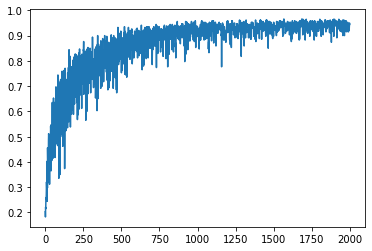

In [12]:
plt.plot(history.history['val_accuracy'])

In [9]:
from sklearn.metrics import confusion_matrix

[[19  0  1  0  0  0  5  0  2]
 [ 0 16  1  1  0  0  0  0  0]
 [ 0  0 31  0  2  0  0  0  0]
 [ 0  1  1 14  0  0  1  0  0]
 [ 0  0  0  0 14  0  1  0  0]
 [ 0  0  0  0  0 14  0  0  0]
 [ 0  0  1  0  0  0 18  0  0]
 [ 0  0  0  0  0  0  0 16  0]
 [ 0  0  0  0  0  0  0  0 28]]


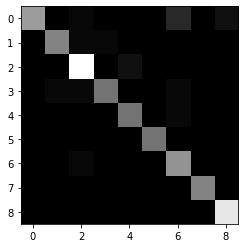

In [15]:
y_pred = model.predict(X_test)
y_p = [np.argmax(yy) for yy in y_pred]
y_tp = [np.argmax(yy) for yy in y_test]
plt.imshow(confusion_matrix(y_tp, y_p), 'gray')
print(confusion_matrix(y_tp, y_p))

In [16]:
with open('./Checkpoints/Model/fruit_classify.json', 'w') as model_write:
    model_write.write(model.to_json())
model.save('./Checkpoints/Weight/fruit_classify.h5')